# SHAP values

Deep SHAP is a high-speed approximation algorithm for SHAP values in deep learning models that builds on a connection with DeepLIFT described in the SHAP NIPS paper. 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import shap

from tensorflow.keras.models import load_model

DATA_DIR = '../Datasets/'
MODELS_DIR = '../Models/'

TRAIN_PATH = DATA_DIR + '/Dataset_train.csv'
TEST_PATH = DATA_DIR + '/Dataset_test.csv'

TRAIN_CF_PATH = DATA_DIR + '/Dataset_train_CF.csv'
TEST_CF_PATH = DATA_DIR + '/Dataset_test_CF.csv'

MODEL_PATH = MODELS_DIR + 'Pres_hybrid.h5'
MODEL_CF_PATH = MODELS_DIR + 'Pres_hybrid_CF.h5'

2024-02-23 14:07:02.391459: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-23 14:07:02.393392: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-23 14:07:02.419005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 14:07:02.419036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 14:07:02.420025: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Load datasets and model, then fit explainer and show SHAP values:

In [2]:
def show_shap_values(train_path, test_path, model_path):
    
    model = load_model(model_path)

    X_train = pd.read_csv(train_path, index_col=0)
    X_test = pd.read_csv(test_path, index_col=0)

    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)

    print(X_train.shape)
    print(X_test.shape)

    bg_train = X_train.sample(n=100, replace=False).to_numpy()
    bg_test = X_test.sample(n=100, replace=False).to_numpy()

    # explainer = shap.Explainer(model.predict, background)
    explainer = shap.DeepExplainer(model, bg_train)
    shap_values = explainer.shap_values(bg_test)

    shap.summary_plot(shap_values, feature_names=X_train.columns, plot_type='bar')

All variables model:

(482119, 16)
(120530, 16)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


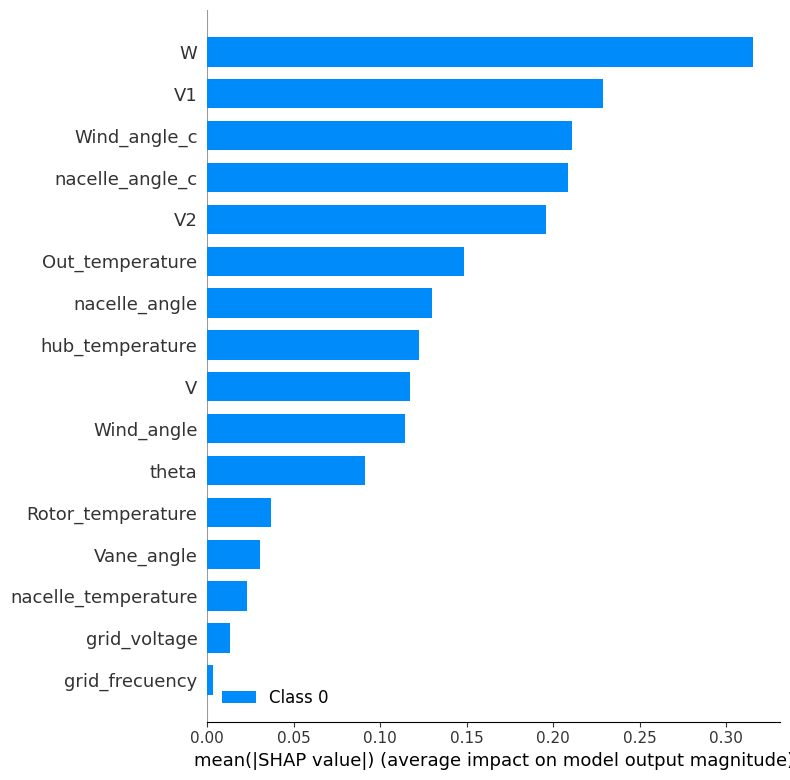

In [4]:
show_shap_values(TRAIN_PATH, TEST_PATH, MODEL_PATH)

Reduced model (correlation filter):

(482119, 12)
(120530, 12)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


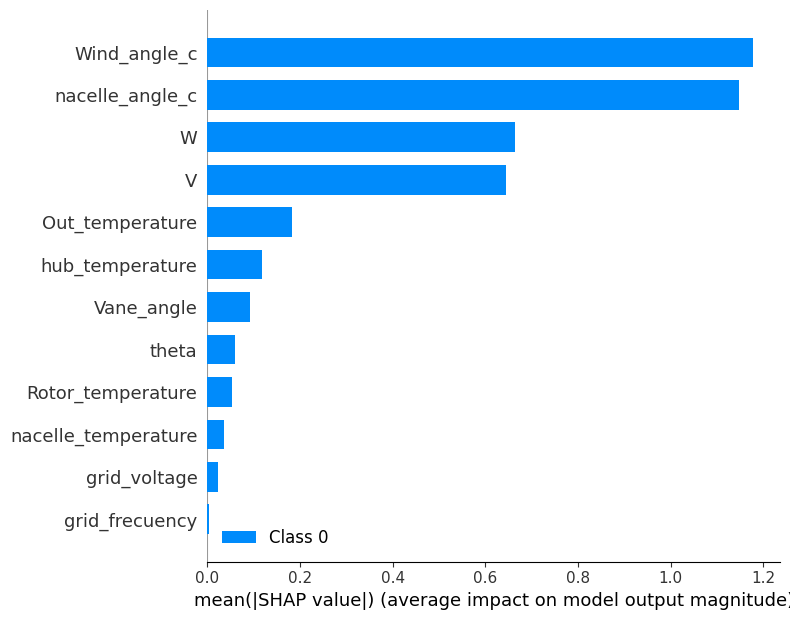

In [5]:
show_shap_values(TRAIN_CF_PATH, TEST_CF_PATH, MODEL_CF_PATH)